# TP 3

### Enunciado

Para la imagen suministrada “eyes” (por ninguna razón en especial, con heterocromía), implementar un algoritmo que:
1. Encuentre la posición de los iris en cada par de ojos y mida su distancia en píxeles.
2. Encuentre la posición de las pupilas en cada par de ojos y mida su distancia en píxeles.

In [1]:
#%matplotlib
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import cm
from os import walk

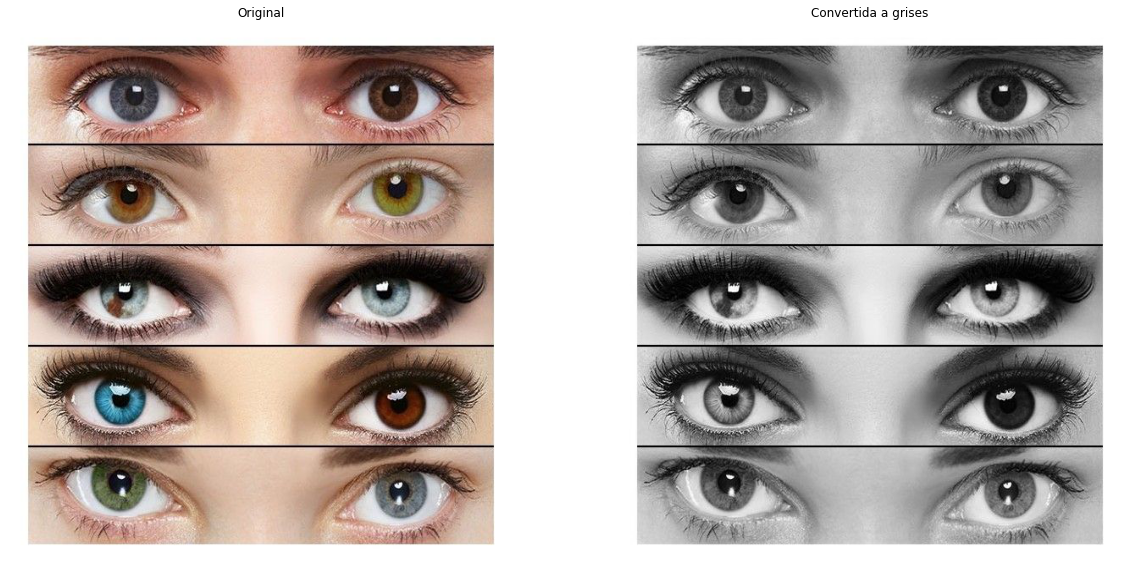

In [2]:
img = cv2.imread("data/eyes.jpg")[...,::-1] # fix colors
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1,2,figsize=(20,10)) 
ax[0].set_title("Original")
ax[0].imshow(img,aspect='auto')
ax[0].axis('off')
ax[1].set_title("Convertida a grises")
ax[1].imshow(gray,aspect='auto',cmap='gray', vmin=0, vmax=255)
ax[1].axis('off')
plt.show()

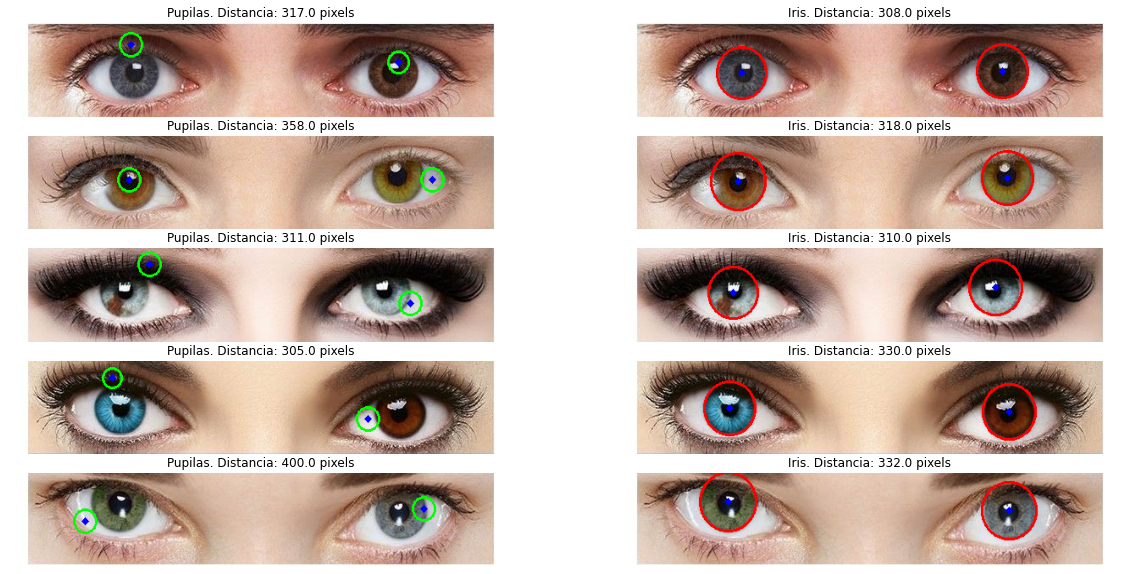

In [3]:
n_eye_pairs = 5
fig, axes = plt.subplots(n_eye_pairs,2,figsize=(20,10)) 
subimg_offset = 24
subimg_height = 106
subimg_padding = 6
for eye_index in range(0,n_eye_pairs):    
    iy0 = subimg_offset+ eye_index*(subimg_height+subimg_padding)
    iy1 = iy0 + subimg_height
    subimg = img[iy0:iy1,:]
    gray = cv2.cvtColor(subimg,cv2.COLOR_BGR2GRAY)
    
    # Iris
    iris_circles = []
    iris_img = subimg.copy()
    circles = cv2.HoughCircles(cv2.medianBlur(gray,5),cv2.HOUGH_GRADIENT,1,minDist=50,param1=140,param2=20,
                           minRadius=27,maxRadius=35)    
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:    
            cv2.circle(iris_img,(i[0],i[1]),i[2],(255,0,0),2)    
            cv2.circle(iris_img,(i[0],i[1]),2,(0,0,255),3)
    if circles.shape[1] == 2:
        x0 = eye0 = float(circles[0][0][0])
        y0 = eye0 = float(circles[0][0][1])
        x1 = eye1 = float(circles[0][1][0])
        y1 = eye1 = float(circles[0][1][1])
        iris_eye_dist = np.round(np.sqrt((x1-x0)**2 +(y1-y0)**2))
    else:
        iris_eye_dist = None
    
    # Pupils
    pupils_img = subimg.copy()

    # Prueba con sugerencia de foro: CLAHE
    clahe = cv2.createCLAHE(clipLimit=51, tileGridSize=(10,10))
    cl1 = clahe.apply(cv2.blur(gray,(20,20)))
    circles = cv2.HoughCircles( cl1,cv2.HOUGH_GRADIENT,1,minDist=300,param1=230,
                            param2=5,minRadius=6,maxRadius=14)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            cv2.circle(pupils_img,(i[0],i[1]),i[2],(0,255,0),2)    
            cv2.circle(pupils_img,(i[0],i[1]),2,(0,0,255),3)
    if circles.shape[1] == 2:
        x0 = eye0 = float(circles[0][0][0])
        y0 = eye0 = float(circles[0][0][1])
        x1 = eye1 = float(circles[0][1][0])
        y1 = eye1 = float(circles[0][1][1])
        pupils_eye_dist = np.round(np.sqrt((x1-x0)**2 +(y1-y0)**2))
    else:
        pupils_eye_dist = None            
    
    axes[eye_index][0].set_title(f"Pupilas. Distancia: {pupils_eye_dist} pixels")
    axes[eye_index][0].imshow(pupils_img,aspect='auto')
    axes[eye_index][0].axis('off')
    axes[eye_index][1].set_title(f"Iris. Distancia: {iris_eye_dist} pixels")
    axes[eye_index][1].imshow(iris_img,aspect='auto')
    axes[eye_index][1].axis('off')
plt.show()    